[-1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1  2 -1 -1
  0  2 -1 -1 -1 -1 -1 -1  3 -1  3  3 -1 -1  3 -1 -1  0  1 -1 -1  2 -1 -1
 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1  3 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  3 -1 -1 -1 -1 -1 -1 -1  2 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1  1 -1 -1
  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  2 -1  3 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1  0  2 -1  1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  3 -1 -1  1 -1 -1 -1  2 -1  1 -1  2 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1

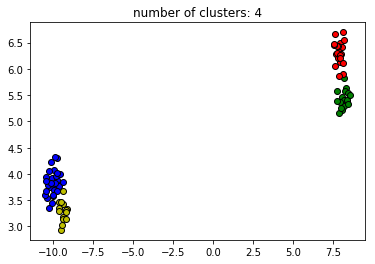

In [13]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 

# Load data in X 
X , label = make_blobs (n_samples=500, random_state = 20)
db = DBSCAN(eps=0.3, min_samples=10).fit(X) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ 

# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 

print(labels) 

# Plot result 
import matplotlib.pyplot as plt 

# Black removed and is used for noise instead. 
unique_labels = set(labels) 
colors = ['y', 'b', 'g', 'r'] 
print(colors) 
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        # Black used for noise. 
        col = 'k'

    class_member_mask = (labels == k) 

    xy = X[class_member_mask & core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                    markeredgecolor='k', 
                                    markersize=6) 

    xy = X[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                    markeredgecolor='k', 
                                    markersize=6) 

plt.title('number of clusters: %d' %n_clusters_) 
plt.show() 
